# Yuval Bar-On 318227261
# Tahel Hermon 325053221

In [1]:
!pip install plotly
!pip install pymc arviz aesara pytensor scipy

import plotly.graph_objects as go
import numpy as np
# from google.colab import drive
# drive.mount('/content/drive')
import pymc as pm
import arviz as az
import pickle as pkl
import pandas as pd
import matplotlib.pyplot as plt

#נתיב מקומי
event_log_single_ser = pkl.load(open('event_log_part_2.pkl', 'rb'))
n_true = pkl.load(open('n_true.pkl', 'rb'))
df_res = pkl.load(open('res_template.pkl', 'rb'))

You should consider upgrading via the 'C:\Users\yuval\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.
You should consider upgrading via the 'C:\Users\yuval\AppData\Local\Programs\Python\Python310\python.exe -m pip install --upgrade pip' command.
WARNING (pytensor.configdefaults): g++ not available, if using conda: `conda install gxx`


WARNING (pytensor.configdefaults): g++ not detected!  PyTensor will be unable to compile C-implementations and will default to Python. Performance may be severely degraded. To remove this warning, set PyTensor flags cxx to an empty string.


# ER analysis

### You are now incharge of the a queueing system in the ER, which operates 24/7.

### Patients are arriving with time-dependant rate. The service rate on the other is constanst at 15 patients per hour. We split the week into a 168 grid, where we have 7 days and 24 hours within a single day. For each cell in the grid, that is a combination of a day and an hour we have different service rate.

### We wish to analyze the expceted number of pateints in the ER as function of time. We have an event log of customers arriving to the ER and departing the ER. We have data collection of 1000 days.

### The data is a dictionary of 1000 different days numbered from 0 to 999. Each one is an event log of a different day.

### The columns of the data are:
#### 1. Customer_id - identifier of the arriving customer
#### 2. Time-stamp  - the time the event occurs. The units are in hours. The $i^{th}$ hour is the number of hours elapsed since 0:00 of that day.
#### 3. Type - event type, Arrival or Departure.
#### 4. num_cust - number of cusotmers in the system
#### 5. day - a numerical value of the day: {0: Sunday, 1: Monday, 2: Tuesday, 3: Wednesday, 4: Thursday, 5: Friday, 6: Shabbat}
#### 6. hour - the hour of the day, an integer from 0 to 23. If it is 0 then the hour is between midnight to 01:00.
#### 7. day_name - the name of the day of the week.


## Each day starts with 0 patients at 0:00.

# The goal of this task is to find the arrival rate for each hour of the day.

## From the data, one can use classic stastical methods in order to estimate the arrival rate for each hour of the week. The problem is that there is missing data, we do not have the data in the event log for all hours.

### The main idea is to estimate the arrival rate for time zones in which we have data and then using GP regression for time zones the data was missing.

### This part is split into three parts.


In [2]:
event_log_single_ser = pkl.load(open('event_log_part_2.pkl', 'rb'))

event_log_single_ser[0].head()

,Customer_id,Time_stamp,Type,num_cust,day,hour,day_name
0,1,0.006849,Arrival,1,0,0,Sunday
1,1,0.030546,Departure,0,0,0,Sunday
2,2,0.080376,Arrival,1,0,0,Sunday
3,2,0.113483,Departure,0,0,0,Sunday
4,3,0.295239,Arrival,1,0,0,Sunday


## Part 1:

### Tasks:

### 1. Do Bayesian anaysis for the number of arriving customers and its distirbution for the time between 0:00 to 1:00.
### 2. What did you use as the likelihood function and why?
### 3. Do  posterior predicitive anaysis to assert that the chosen likelihood distribution is valid.
### 4. According to the resulted anaysis, how certain are you about the average arrival prediction?

### 5. What is the estimated arrival rate? Give a single values based on the posterior.


 1.1 ******************************************************************************************************************************
Number of days: 1000
Average arrivals per hour (0:00-1:00): 24.98
Standard deviation: 4.67
First 10 observations: [27 21 22 23 27 25 15 22 22 29]


Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [lambda_rate]


C:\Users\yuval\AppData\Local\Programs\Python\Python310\lib\site-packages\rich\live.py:231: UserWarning: install 
"ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 383 seconds.


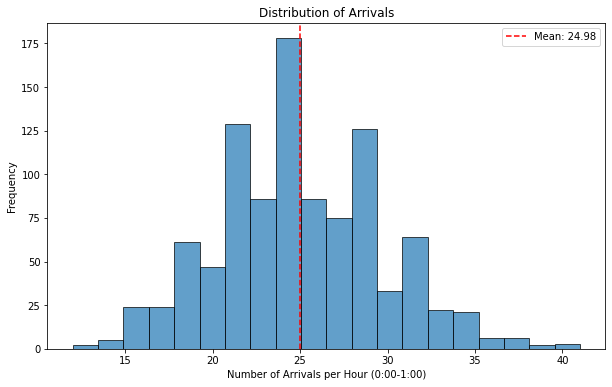

Sampling: [arrivals]


C:\Users\yuval\AppData\Local\Programs\Python\Python310\lib\site-packages\rich\live.py:231: UserWarning: install 
"ipywidgets" for Jupyter support
  warnings.warn('install "ipywidgets" for Jupyter support')

 1.2 ******************************************************************************************************************************

Normal (Gaussian):
- נותנת ערכים רציפים - יכול להיות 2.3 מטופלים (בלתי אפשרי)
- יכולה לתת ערכים שליליים - -5 מטופלים (אבסורד)

Binomial:
- צריכה מספר קבוע של ניסויים (n)
- כאן אין גבול עליון ברור - כמה מטופלים יכולים לבוא? אין גבול

Exponential:
- מודלת זמן בין אירועים, לא מספר אירועים
- אם רצינו לדעת כמה זמן עד המטופל הבא - זה היה מתאים

Uniform:
- כל מספר באותה הסתברות - 1 מטופל = 50 מטופלים (לא הגיוני)

למה Poisson מנצחת:
- רק מספרים שלמים חיוביים
- מתאימה לספירת אירועים נדירים
- פרמטר אחד פשוט (λ)
- זה הסטנדרט בתורת התורים
- ניתן לראות לפי הגרף שלנו
 1.3 ******************************************************************************************************************************


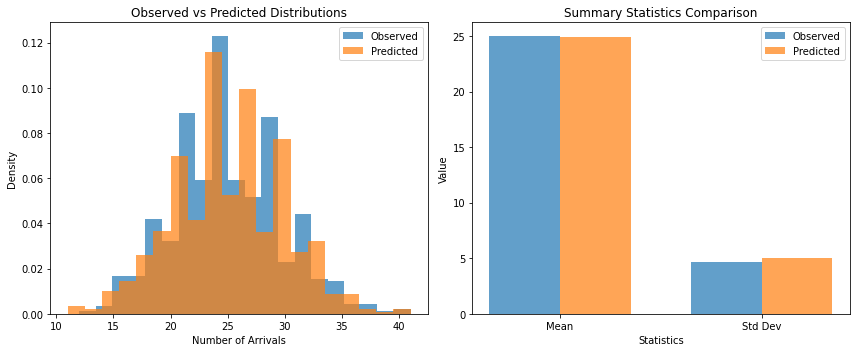

 Posterior Predictive Check Results
Observed mean: 24.98
Predicted mean: 24.96
Observed std: 4.67
Predicted std: 5.00
 1.4 ******************************************************************************************************************************


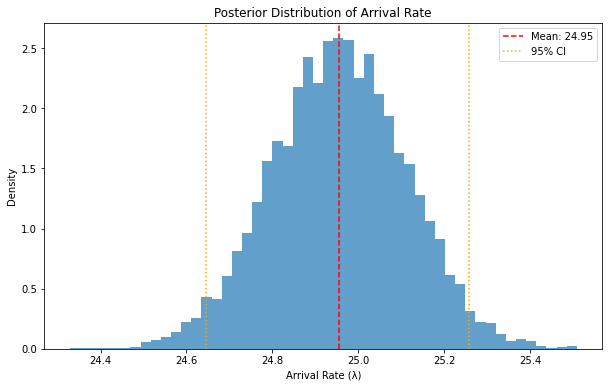

Posterior mean: 24.955
Posterior std: 0.157
95% Credible Interval: [24.644, 25.258]
68% Credible Interval: [24.798, 25.113]
Coefficient of Variation: 0.006
Certainty level: 99.4%
 1.5 ******************************************************************************************************************************
Single point estimate (posterior mean): 24.955 arrivals per hour


In [3]:
# Part 1: Bayesian Analysis for 0:00-1:00 time period
import pymc as pm
import arviz as az
import numpy as np
import matplotlib.pyplot as plt

#############################################
# Task 1: Do Bayesian analysis for the number of arriving customers and its distribution for the time between 0:00 to 1:00
#############################################
print(" 1.1 ******************************************************************************************************************************")

#א
# חילוץ נתונים עבור תקופת 0:00-1:00
midnight_arrivals = []
for day in range(len(event_log_single_ser)):
   day_data = event_log_single_ser[day]
   arrivals = day_data[(day_data['hour'] == 0) & (day_data['Type'] == 'Arrival')]
   midnight_arrivals.append(len(arrivals))
#ב
#סטטיסטיקות
midnight_arrivals = np.array(midnight_arrivals)
print(f"Number of days: {len(midnight_arrivals)}")
print(f"Average arrivals per hour (0:00-1:00): {np.mean(midnight_arrivals):.2f}")
print(f"Standard deviation: {np.std(midnight_arrivals):.2f}")
print(f"First 10 observations: {midnight_arrivals[:10]}")

#ג
# בניית מודל בייסיאני
with pm.Model() as bayesian_model:
   # Prior עבור קצב ההגעות (lambda)
   lambda_rate = pm.Gamma('lambda_rate', alpha=2, beta=1)
   
   # Likelihood - התפלגות פואסון עבור נתוני ספירה
   arrivals = pm.Poisson('arrivals', mu=lambda_rate, observed=midnight_arrivals)
   
   # דגימה מה-posterior
   trace = pm.sample(2000, tune=1000, random_seed=42)

# הצגת תוצאות
az.summary(trace)

#ד
# ההתפלגות
plt.figure(figsize=(10, 6))
plt.hist(midnight_arrivals, bins=20, alpha=0.7, edgecolor='black')
plt.xlabel('Number of Arrivals per Hour (0:00-1:00)')
plt.ylabel('Frequency')
plt.title('Distribution of Arrivals')
plt.axvline(np.mean(midnight_arrivals), color='red', linestyle='--', 
           label=f'Mean: {np.mean(midnight_arrivals):.2f}')
plt.legend()
plt.show()


#############################################
# Task 2: What did you use as the likelihood function and why?
#############################################
print(" 1.2 ******************************************************************************************************************************")

#"השוואת התפלגויות עבור מודל ההגעות"
print("\nNormal (Gaussian):")
print("- נותנת ערכים רציפים - יכול להיות 2.3 מטופלים (בלתי אפשרי)")
print("- יכולה לתת ערכים שליליים - -5 מטופלים (אבסורד)")

print("\nBinomial:")
print("- צריכה מספר קבוע של ניסויים (n)")
print("- כאן אין גבול עליון ברור - כמה מטופלים יכולים לבוא? אין גבול")

print("\nExponential:")
print("- מודלת זמן בין אירועים, לא מספר אירועים")
print("- אם רצינו לדעת כמה זמן עד המטופל הבא - זה היה מתאים")

print("\nUniform:")
print("- כל מספר באותה הסתברות - 1 מטופל = 50 מטופלים (לא הגיוני)")

print("\nלמה Poisson מנצחת:")
print("- רק מספרים שלמים חיוביים")
print("- מתאימה לספירת אירועים נדירים")
print("- פרמטר אחד פשוט (λ)")
print("- זה הסטנדרט בתורת התורים")
print("- ניתן לראות לפי הגרף שלנו")


#############################################
# Task 3: Do posterior predictive analysis to assert that the chosen likelihood distribution is valid
#############################################
print(" 1.3 ******************************************************************************************************************************")
with bayesian_model:
   posterior_predictive = pm.sample_posterior_predictive(trace, random_seed=42)

# השוואה בין נתונים נצפים לחזויים
observed_data = midnight_arrivals
predicted_data = posterior_predictive.posterior_predictive['arrivals'].values.flatten()

plt.figure(figsize=(12, 5))

# השוואת היסטוגרמות
plt.subplot(1, 2, 1)
plt.hist(observed_data, bins=20, alpha=0.7, label='Observed', density=True)
plt.hist(predicted_data[:len(observed_data)], bins=20, alpha=0.7, label='Predicted', density=True)
plt.xlabel('Number of Arrivals')
plt.ylabel('Density')
plt.title('Observed vs Predicted Distributions')
plt.legend()

# השוואת סטטיסטיקות תיאוריות
plt.subplot(1, 2, 2)
stats_obs = [np.mean(observed_data), np.std(observed_data)]
stats_pred = [np.mean(predicted_data), np.std(predicted_data)]
x_pos = np.arange(2)
width = 0.35

plt.bar(x_pos - width/2, stats_obs, width, label='Observed', alpha=0.7)
plt.bar(x_pos + width/2, stats_pred, width, label='Predicted', alpha=0.7)
plt.xlabel('Statistics')
plt.ylabel('Value')
plt.title('Summary Statistics Comparison')
plt.xticks(x_pos, ['Mean', 'Std Dev'])
plt.legend()

plt.tight_layout()
plt.show()

print(" Posterior Predictive Check Results")
print(f"Observed mean: {np.mean(observed_data):.2f}")
print(f"Predicted mean: {np.mean(predicted_data):.2f}")
print(f"Observed std: {np.std(observed_data):.2f}")
print(f"Predicted std: {np.std(predicted_data):.2f}")



#############################################
# Task 4: According to the resulted analysis, how certain are you about the average arrival prediction?
#############################################
print(" 1.4 ******************************************************************************************************************************")
lambda_posterior = trace.posterior['lambda_rate'].values.flatten()

# חישוב רווחי אמינות
credible_interval_95 = np.percentile(lambda_posterior, [2.5, 97.5])
credible_interval_68 = np.percentile(lambda_posterior, [16, 84])

plt.figure(figsize=(10, 6))
plt.hist(lambda_posterior, bins=50, alpha=0.7, density=True)
plt.axvline(np.mean(lambda_posterior), color='red', linestyle='--', label=f'Mean: {np.mean(lambda_posterior):.2f}')
plt.axvline(credible_interval_95[0], color='orange', linestyle=':', label='95% CI')
plt.axvline(credible_interval_95[1], color='orange', linestyle=':', label='_nolegend_')
plt.xlabel('Arrival Rate (λ)')
plt.ylabel('Density')
plt.title('Posterior Distribution of Arrival Rate')
plt.legend()
plt.show()


print(f"Posterior mean: {np.mean(lambda_posterior):.3f}")
print(f"Posterior std: {np.std(lambda_posterior):.3f}")
print(f"95% Credible Interval: [{credible_interval_95[0]:.3f}, {credible_interval_95[1]:.3f}]")
print(f"68% Credible Interval: [{credible_interval_68[0]:.3f}, {credible_interval_68[1]:.3f}]")
print(f"Coefficient of Variation: {np.std(lambda_posterior)/np.mean(lambda_posterior):.3f}")

certainty_level = 1 - (np.std(lambda_posterior)/np.mean(lambda_posterior))
print(f"Certainty level: {certainty_level:.1%}")


#############################################
# Task 5: What is the estimated arrival rate? Give a single values based on the posterior
#############################################
print(" 1.5 ******************************************************************************************************************************")
posterior_mean = np.mean(lambda_posterior)

print(f"Single point estimate (posterior mean): {posterior_mean:.3f} arrivals per hour")

## Part 2:
### We have 24 hours a day, 7 days a week. In total we have a grid of 168 cells.

### We wish to map the average arrival rate at each time cell.

### In the dataset we have missing parts, some cells in the grid are missing. Your job is to fill the grid.

## Tasks:

### 1. Extract the arrival rate (taking the average time is sufficient, no need  for extra bayesian analysis) per each cell you do have data.
### 2. Use GP regression for completing the average arrival time for the rest of the grid.
### 3. Plot on a 3D plot which contains:
#### a. Scatter plot of the data that was esitmated from data.
#### b. Scatter plot of the data that was esitmated from GP regression.
#### c. Surface plot of the GP regression.

### 4. What is the probability that the arrival rate between 18:00 to 19:00, on Shabbat, will be between 9 to 10 pateints per hour?
### 5. Please give full specification of the Gauusian distribution of the arrival rate on Monday between 18:00 to 19:00 and Monday between 19:00 to 20:00.
### 6. What is the correlation between the arrival rate at Sunday between 07:00 to 08:00 and Sunday between 08:00 to 09:00?
### What is the correlation between the arrival rate at Sunday between 07:00 to 08:00 and Sunday between 19:00 to 20:00?
### Which correlation value is larger? does this result make sense?

 2.1 ******************************************************************************************************************************
Extracting arrival rates from 1000 days of data...
Grid analysis:
  Total cells: 168 (7 days × 24 hours)
  Cells with data: 80
  Cells without data (missing): 88
  Missing data percentage: 52.4%

Overall average arrival rate across all cells with data: 12.12 arrivals/hour
 2.2 ******************************************************************************************************************************
Calculating real standard deviations for observed data...
GP regression setup:
  Training data: 80 cells
  Missing data to predict: 88 cells
Training GP model...
Trained kernel: RBF(length_scale=2.92) + WhiteKernel(noise_level=0.0228)
Predictions completed for 88 missing cells
Mean predicted rate: 11.80
Mean prediction uncertainty: 1.19

Real standard deviations statistics:
  Mean std of observed data: 3.365
  Min std: 1.770
  Max std: 4.933
 2.3 ************

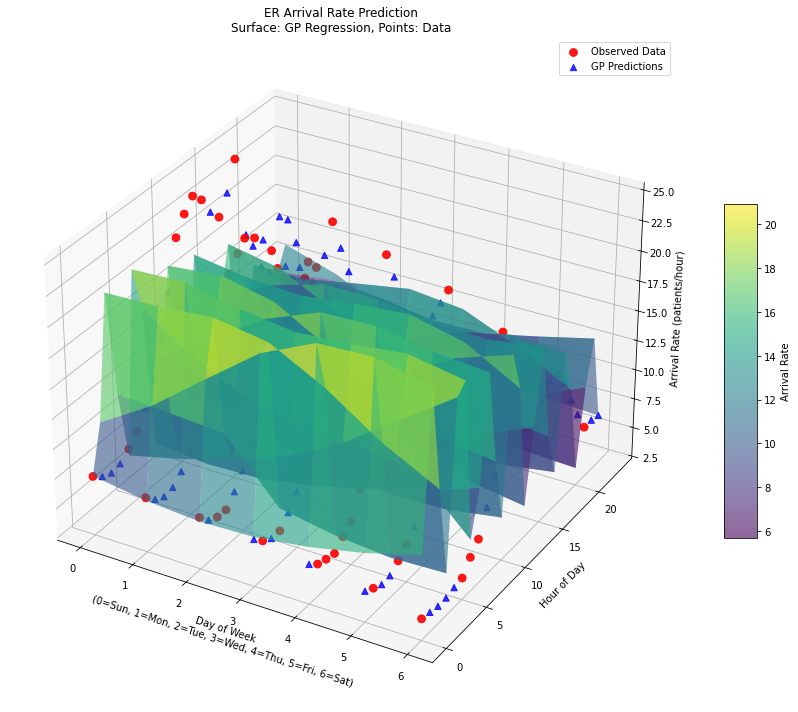

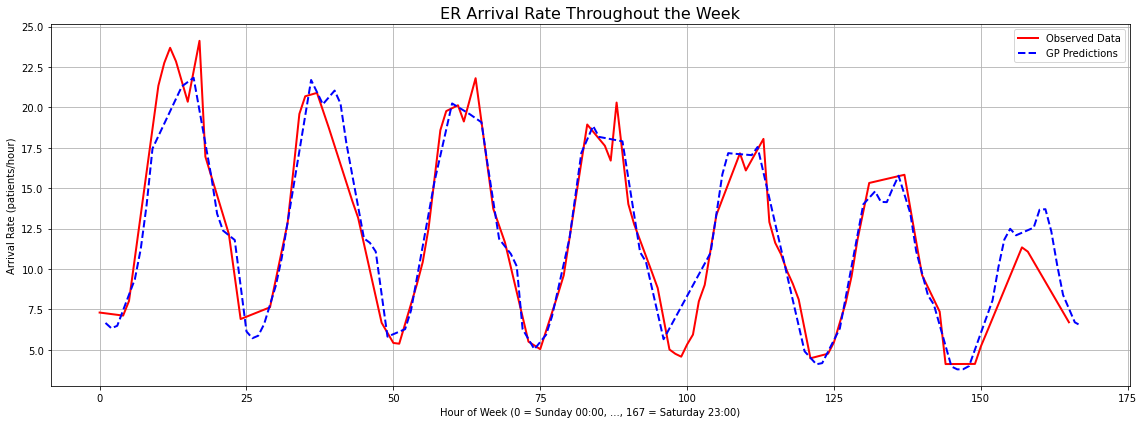

 2.4 ******************************************************************************************************************************
Shabbat 18:00-19:00 statistics:
  Mean arrival rate: 12.321 patients/hour
  Standard deviation: 1.688
  Data source: GP Prediction

Probability calculation:
  P(9 ≤ λ ≤ 10) = Φ(10; μ=12.321, σ=1.688) - Φ(9; μ=12.321, σ=1.688)
  P(9 ≤ λ ≤ 10) = 0.0600 = 6.00%
 2.5 ******************************************************************************************************************************
Monday 18:00-19:00 Gaussian Distribution:
  μ = 17.7831
  σ = 1.0368
  σ² = 1.0750
  Full specification: λ ~ N(17.7831, 1.0750)
  Data source: GP Prediction

Monday 19:00-20:00 Gaussian Distribution:
  μ = 14.2150
  σ = 3.8031
  σ² = 14.4632
  Full specification: λ ~ N(14.2150, 14.4632)
  Data source: Observed Data
 2.6 ******************************************************************************************************************************
Correlation calculations:
  

In [5]:
# Part 2: GP Regression for ER Arrival Rate Prediction
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, WhiteKernel
from scipy.stats import norm
import warnings
warnings.filterwarnings('ignore')



##############################################################################
# Task 1: Extract arrival rate per each cell you do have data
##############################################################################
print(" 2.1 ******************************************************************************************************************************")
#print("Task 1: Extract arrival rate (taking the average) per each cell from available data")

def extract_arrival_rates_from_data(event_log_single_ser):
    """
    חילוץ קצב ההגעות הממוצע לכל תא בגריד 7x24
    """
    arrival_rates_grid = {}
    
    # עבור כל תא בגריד
    for day in range(7):  # 0=Sunday, 1=Monday, ..., 6=Saturday  
        for hour in range(24):  # 0-23
            daily_arrivals = []
            
            # עבור כל יום בנתונים (1000 ימים)
            for day_idx in range(1000):
                day_data = event_log_single_ser[day_idx]
                
                # סינון ההגעות לתא הנוכחי
                arrivals_in_cell = day_data[
                    (day_data['day'] == day) & 
                    (day_data['hour'] == hour) & 
                    (day_data['Type'] == 'Arrival')
                ]
                
                # ספירת מספר ההגעות
                num_arrivals = len(arrivals_in_cell)
                
                # בדיקה שיש בכלל נתונים לתא הזה ביום הזה
                total_events_in_cell = day_data[
                    (day_data['day'] == day) & 
                    (day_data['hour'] == hour)
                ]
                
                if len(total_events_in_cell) > 0:  # יש נתונים לתא הזה
                    daily_arrivals.append(num_arrivals)
            
            # חישוב הממוצע אם יש נתונים
            if len(daily_arrivals) > 0:
                avg_arrival_rate = np.mean(daily_arrivals)
                arrival_rates_grid[(day, hour)] = {
                    'rate': avg_arrival_rate,
                    'observations': len(daily_arrivals),
                    'has_data': True
                }
            else:
                arrival_rates_grid[(day, hour)] = {
                    'rate': np.nan,
                    'observations': 0,
                    'has_data': False
                }
    
    return arrival_rates_grid

# חילוץ קצבי ההגעות
print("Extracting arrival rates from 1000 days of data...")
arrival_rates_grid = extract_arrival_rates_from_data(event_log_single_ser)

# ספירת תאים עם ובלי נתונים
cells_with_data = sum(1 for cell in arrival_rates_grid.values() if cell['has_data'])
cells_without_data = 168 - cells_with_data

print(f"Grid analysis:")
print(f"  Total cells: 168 (7 days × 24 hours)")
print(f"  Cells with data: {cells_with_data}")
print(f"  Cells without data (missing): {cells_without_data}")
print(f"  Missing data percentage: {(cells_without_data/168)*100:.1f}%")

# חישוב ממוצע כולל של כל התאים עם נתונים
rates_with_data = [data['rate'] for data in arrival_rates_grid.values() if data['has_data']]
overall_average = np.mean(rates_with_data)

print(f"\nOverall average arrival rate across all cells with data: {overall_average:.2f} arrivals/hour")





##############################################################################
# Task 2: Use GP regression for completing the average arrival time for the rest of the grid
##############################################################################
#print(" 2.2 ******************************************************************************************************************************")
#print("Task 2: GP regression for completing missing arrival rates")

# def prepare_data_for_gp(arrival_rates_grid):
#     """
#     הכנת הנתונים עבור GP regression
#     """
#     X_observed = []
#     y_observed = []
#     X_missing = []
#     missing_cells = []
    
#     for (day, hour), data in arrival_rates_grid.items():
#         if data['has_data']:
#             X_observed.append([day, hour])
#             y_observed.append(data['rate'])
#         else:
#             X_missing.append([day, hour])
#             missing_cells.append((day, hour))
    
#     return np.array(X_observed), np.array(y_observed), np.array(X_missing), missing_cells

# # הכנת הנתונים
# X_observed, y_observed, X_missing, missing_cells = prepare_data_for_gp(arrival_rates_grid)

# print(f"GP regression setup:")
# print(f"  Training data: {len(X_observed)} cells")
# print(f"  Missing data to predict: {len(X_missing)} cells")

# if len(X_missing) > 0:
#     # הגדרת GP עם kernel פשוט
#     kernel = RBF(length_scale=1.0) + WhiteKernel(noise_level=0.1)
#     gp = GaussianProcessRegressor(kernel=kernel, random_state=42, normalize_y=True)
    
#     # אימון הדגם
#     print("Training GP model...")
#     gp.fit(X_observed, y_observed)
    
#     print(f"Trained kernel: {gp.kernel_}")
    
#     # חיזוי עבור התאים החסרים
#     y_pred_missing, y_std_missing = gp.predict(X_missing, return_std=True)
    
#     print(f"Predictions completed for {len(y_pred_missing)} missing cells")
#     print(f"Mean predicted rate: {np.mean(y_pred_missing):.2f}")
#     print(f"Mean prediction uncertainty: {np.mean(y_std_missing):.2f}")
    
#     # עדכון הגריד עם התחזיות
#     for i, (day, hour) in enumerate(missing_cells):
#         arrival_rates_grid[(day, hour)]['rate'] = y_pred_missing[i]
#         arrival_rates_grid[(day, hour)]['std'] = y_std_missing[i]
#         arrival_rates_grid[(day, hour)]['is_predicted'] = True
    
#     # הוספת std גם לתאים שאינם חזויים
#     for (day, hour), data in arrival_rates_grid.items():
#         if data['has_data']:
#             data['std'] = 0.1  # הערכה של אי-ודאות נמוכה לנתונים אמיתיים
#             data['is_predicted'] = False

# else:
#     print("No missing data found - all cells have observations!")
#     # הוספת GP גם אם אין נתונים חסרים לצורך הניתוחים הבאים
#     kernel = RBF(length_scale=1.0) + WhiteKernel(noise_level=0.1)
#     gp = GaussianProcessRegressor(kernel=kernel, random_state=42, normalize_y=True)
#     gp.fit(X_observed, y_observed)
    
#     # הוספת std לכל התאים
#     for (day, hour), data in arrival_rates_grid.items():
#         data['std'] = 0.1
#         data['is_predicted'] = False
        

##############################################################################
# Task 2: Use GP regression for completing the average arrival time for the rest of the grid
##############################################################################
print(" 2.2 ******************************************************************************************************************************")
#print("Task 2: GP regression for completing missing arrival rates")

def calculate_real_std_for_observed_data(event_log_single_ser, arrival_rates_grid):
    """
    חישוב סטיית תקן אמיתית לכל תא עם נתונים אמיתיים
    """
    for day in range(7):
        for hour in range(24):
            if arrival_rates_grid[(day, hour)]['has_data']:
                daily_arrivals = []
                
                # עבור כל יום בנתונים (1000 ימים) - אותו חישוב כמו בסעיף 2.1
                for day_idx in range(1000):
                    day_data = event_log_single_ser[day_idx]
                    
                    # סינון ההגעות לתא הנוכחי
                    arrivals_in_cell = day_data[
                        (day_data['day'] == day) & 
                        (day_data['hour'] == hour) & 
                        (day_data['Type'] == 'Arrival')
                    ]
                    
                    # ספירת מספר ההגעות
                    num_arrivals = len(arrivals_in_cell)
                    
                    # בדיקה שיש בכלל נתונים לתא הזה ביום הזה
                    total_events_in_cell = day_data[
                        (day_data['day'] == day) & 
                        (day_data['hour'] == hour)
                    ]
                    
                    if len(total_events_in_cell) > 0:  # יש נתונים לתא הזה
                        daily_arrivals.append(num_arrivals)
                
                # חישוב סטיית התקן האמיתית
                if len(daily_arrivals) > 1:  # צריך לפחות 2 תצפיות לסטיית תקן
                    real_std = np.std(daily_arrivals, ddof=1)  # sample standard deviation
                    arrival_rates_grid[(day, hour)]['std'] = max(real_std, 0.01)  # מינימום 0.01
                else:
                    arrival_rates_grid[(day, hour)]['std'] = 0.1  # ברירת מחדל אם אין מספיק נתונים

def prepare_data_for_gp(arrival_rates_grid):
    """
    הכנת הנתונים עבור GP regression
    """
    X_observed = []
    y_observed = []
    X_missing = []
    missing_cells = []
    
    for (day, hour), data in arrival_rates_grid.items():
        if data['has_data']:
            X_observed.append([day, hour])
            y_observed.append(data['rate'])
        else:
            X_missing.append([day, hour])
            missing_cells.append((day, hour))
    
    return np.array(X_observed), np.array(y_observed), np.array(X_missing), missing_cells

# חישוב סטיות תקן אמיתיות לנתונים הקיימים
print("Calculating real standard deviations for observed data...")
calculate_real_std_for_observed_data(event_log_single_ser, arrival_rates_grid)

# הכנת הנתונים
X_observed, y_observed, X_missing, missing_cells = prepare_data_for_gp(arrival_rates_grid)

print(f"GP regression setup:")
print(f"  Training data: {len(X_observed)} cells")
print(f"  Missing data to predict: {len(X_missing)} cells")

if len(X_missing) > 0:
    # הגדרת GP עם kernel פשוט
    kernel = RBF(length_scale=1.0) + WhiteKernel(noise_level=0.1)
    gp = GaussianProcessRegressor(kernel=kernel, random_state=42, normalize_y=True)
    
    # אימון הדגם
    print("Training GP model...")
    gp.fit(X_observed, y_observed)
    
    print(f"Trained kernel: {gp.kernel_}")
    
    # חיזוי עבור התאים החסרים
    y_pred_missing, y_std_missing = gp.predict(X_missing, return_std=True)
    
    print(f"Predictions completed for {len(y_pred_missing)} missing cells")
    print(f"Mean predicted rate: {np.mean(y_pred_missing):.2f}")
    print(f"Mean prediction uncertainty: {np.mean(y_std_missing):.2f}")
    
    # עדכון הגריד עם התחזיות
    for i, (day, hour) in enumerate(missing_cells):
        arrival_rates_grid[(day, hour)]['rate'] = y_pred_missing[i]
        arrival_rates_grid[(day, hour)]['std'] = y_std_missing[i]
        arrival_rates_grid[(day, hour)]['is_predicted'] = True
    
    # סימון שהנתונים הקיימים אינם חזויים
    for (day, hour), data in arrival_rates_grid.items():
        if data['has_data']:
            data['is_predicted'] = False

else:
    print("No missing data found - all cells have observations!")
    # הגדרת GP גם אם אין נתונים חסרים לצורך הניתוחים הבאים
    kernel = RBF(length_scale=1.0) + WhiteKernel(noise_level=0.1)
    gp = GaussianProcessRegressor(kernel=kernel, random_state=42, normalize_y=True)
    gp.fit(X_observed, y_observed)
    
    # סימון שכל הנתונים אינם חזויים
    for (day, hour), data in arrival_rates_grid.items():
        data['is_predicted'] = False

# הצגת סטטיסטיקות של הסטיות התקניות
observed_stds = [data['std'] for data in arrival_rates_grid.values() if data['has_data']]
if observed_stds:
    print(f"\nReal standard deviations statistics:")
    print(f"  Mean std of observed data: {np.mean(observed_stds):.3f}")
    print(f"  Min std: {np.min(observed_stds):.3f}")
    print(f"  Max std: {np.max(observed_stds):.3f}")        

##############################################################################
# Task 3: Plot 3D visualization
##############################################################################
print(" 2.3 ******************************************************************************************************************************")
#print("Task 3: Creating 3D plot with scatter plots and surface plot")

def create_3d_visualization(arrival_rates_grid):
    """
    יצירת ויזואליזציה תלת-ממדית
    """
    # הכנת הנתונים לגרפים
    days_all = []
    hours_all = []
    rates_all = []
    is_predicted_all = []
    
    for (day, hour), data in arrival_rates_grid.items():
        days_all.append(day)
        hours_all.append(hour)
        rates_all.append(data['rate'])
        is_predicted_all.append(data.get('is_predicted', False))
    
    days_all = np.array(days_all)
    hours_all = np.array(hours_all)
    rates_all = np.array(rates_all)
    is_predicted_all = np.array(is_predicted_all)
    
    # הפרדת נתונים נצפים וחזויים
    observed_mask = ~is_predicted_all
    predicted_mask = is_predicted_all
    
    # יצירת surface לGP regression
    day_surf = np.arange(7)
    hour_surf = np.arange(24)
    Day_mesh, Hour_mesh = np.meshgrid(day_surf, hour_surf)
    
    # חיזוי GP לכל הגריד לצורך ה-surface
    X_full_grid = np.array([[d, h] for d in range(7) for h in range(24)])
    y_full_pred, _ = gp.predict(X_full_grid, return_std=True)
    Rate_mesh = y_full_pred.reshape(24, 7)
    
    # יצירת הגרף
    fig = plt.figure(figsize=(14, 10))
    
    # 3D plot
    ax = fig.add_subplot(111, projection='3d')
    
    # a. Surface plot of GP regression
    surf = ax.plot_surface(Day_mesh, Hour_mesh, Rate_mesh, 
                          alpha=0.6, cmap='viridis', linewidth=0, antialiased=True)
    
    # b. Scatter plot of observed data
    if np.sum(observed_mask) > 0:
        ax.scatter(days_all[observed_mask], hours_all[observed_mask], rates_all[observed_mask],
                  c='red', s=60, alpha=0.9, label='Observed Data', marker='o')
    
    # c. Scatter plot of GP predictions
    if np.sum(predicted_mask) > 0:
        ax.scatter(days_all[predicted_mask], hours_all[predicted_mask], rates_all[predicted_mask],
                  c='blue', s=40, alpha=0.8, label='GP Predictions', marker='^')
    
    # עיצוב הגרף
    ax.set_xlabel('Day of Week\n(0=Sun, 1=Mon, 2=Tue, 3=Wed, 4=Thu, 5=Fri, 6=Sat)')
    ax.set_ylabel('Hour of Day')
    ax.set_zlabel('Arrival Rate (patients/hour)')
    ax.set_title('ER Arrival Rate Prediction\nSurface: GP Regression, Points: Data')
    
    # הוספת legend
    ax.legend()
    
    # הוספת colorbar
    plt.colorbar(surf, ax=ax, shrink=0.5, aspect=10, label='Arrival Rate')
    
    plt.tight_layout()
    plt.show()


create_3d_visualization(arrival_rates_grid)

#עשיתי גם בדו מימדי כי לא הבנתי
import matplotlib.pyplot as plt
import numpy as np

# גרף על סמך הנתונים שלך, מוצג בצורה אינטואיטיבית
def create_2d_visualization(arrival_rates_grid):
    """
    גרף דו־ממדי של שיעורי הגעה לאורך השבוע:
    - קווים מייצגים רצף שעות
    - צבעים נפרדים לנקודות אמתיות ולתחזיות GP
    """
    # איסוף הנתונים
    days = []
    hours = []
    rates = []
    is_predicted = []

    for (day, hour), data in arrival_rates_grid.items():
        days.append(day)
        hours.append(hour)
        rates.append(data['rate'])
        is_predicted.append(data.get('is_predicted', False))

    # המרה למערכים
    days = np.array(days)
    hours = np.array(hours)
    rates = np.array(rates)
    is_predicted = np.array(is_predicted)

    # הפיכת יום ושעה לשעה בשבוע (0 עד 167)
    time_in_week = days * 24 + hours

    # הפרדה בין נמדד לחזוי
    time_obs = time_in_week[~is_predicted]
    rates_obs = rates[~is_predicted]
    time_pred = time_in_week[is_predicted]
    rates_pred = rates[is_predicted]

    # ציור הגרף
    plt.figure(figsize=(16, 6))

    # קו לנקודות האמתיות
    sorted_obs = np.argsort(time_obs)
    plt.plot(time_obs[sorted_obs], rates_obs[sorted_obs], color='red', linewidth=2, label='Observed Data')

    # קו לנקודות התחזית
    if len(time_pred) > 0:
        sorted_pred = np.argsort(time_pred)
        plt.plot(time_pred[sorted_pred], rates_pred[sorted_pred], color='blue', linewidth=2, linestyle='--', label='GP Predictions')

    # עיצוב
    plt.title("ER Arrival Rate Throughout the Week", fontsize=16)
    plt.xlabel("Hour of Week (0 = Sunday 00:00, ..., 167 = Saturday 23:00)")
    plt.ylabel("Arrival Rate (patients/hour)")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()


# הפעלה על הנתונים שלך
create_2d_visualization(arrival_rates_grid)




##############################################################################
# Task 4: Probability calculation for Shabbat 18:00-19:00
##############################################################################
print(" 2.4 ******************************************************************************************************************************")
#print("Task 4: Probability that arrival rate on Shabbat 18:00-19:00 will be between 9-10 patients/hour")

# Shabbat = day 6, hour 18
shabbat_data = arrival_rates_grid[(6, 18)]
mean_rate = shabbat_data['rate']
std_rate = shabbat_data['std']

print(f"Shabbat 18:00-19:00 statistics:")
print(f"  Mean arrival rate: {mean_rate:.3f} patients/hour")
print(f"  Standard deviation: {std_rate:.3f}")
print(f"  Data source: {'GP Prediction' if shabbat_data.get('is_predicted', False) else 'Observed Data'}")

# חישוב P(9 ≤ X ≤ 10)
prob_9_to_10 = norm.cdf(10, mean_rate, std_rate) - norm.cdf(9, mean_rate, std_rate)

print(f"\nProbability calculation:")
print(f"  P(9 ≤ λ ≤ 10) = Φ(10; μ={mean_rate:.3f}, σ={std_rate:.3f}) - Φ(9; μ={mean_rate:.3f}, σ={std_rate:.3f})")
print(f"  P(9 ≤ λ ≤ 10) = {prob_9_to_10:.4f} = {prob_9_to_10*100:.2f}%")

##############################################################################
# Task 5: Gaussian distributions for Monday 18:00-19:00 and 19:00-20:00
##############################################################################
print(" 2.5 ******************************************************************************************************************************")
#print("Task 5: Full specification of Gaussian distributions for Monday hours")

# Monday = day 1
monday_18_data = arrival_rates_grid[(1, 18)]
monday_19_data = arrival_rates_grid[(1, 19)]

print(f"Monday 18:00-19:00 Gaussian Distribution:")
print(f"  μ = {monday_18_data['rate']:.4f}")
print(f"  σ = {monday_18_data['std']:.4f}")
print(f"  σ² = {monday_18_data['std']**2:.4f}")
print(f"  Full specification: λ ~ N({monday_18_data['rate']:.4f}, {monday_18_data['std']**2:.4f})")
print(f"  Data source: {'GP Prediction' if monday_18_data.get('is_predicted', False) else 'Observed Data'}")

print(f"\nMonday 19:00-20:00 Gaussian Distribution:")
print(f"  μ = {monday_19_data['rate']:.4f}")
print(f"  σ = {monday_19_data['std']:.4f}")
print(f"  σ² = {monday_19_data['std']**2:.4f}")
print(f"  Full specification: λ ~ N({monday_19_data['rate']:.4f}, {monday_19_data['std']**2:.4f})")
print(f"  Data source: {'GP Prediction' if monday_19_data.get('is_predicted', False) else 'Observed Data'}")


##############################################################################
# Task 6: Correlation analysis for Sunday
##############################################################################
print(" 2.6 ******************************************************************************************************************************")
#print("Task 6: Correlation analysis for Sunday time slots")

# חישוב קורלציות דרך GP kernel
def calculate_gp_correlation(gp, point1, point2):
    """
    חישוב קורלציה בין שתי נקודות דרך GP kernel
    """
    X_points = np.array([point1, point2])
    K = gp.kernel_(X_points)
    
    # נרמול לקורלציה
    correlation = K[0, 1] / np.sqrt(K[0, 0] * K[1, 1])
    return correlation

# Sunday = day 0
sunday_07_08 = [0, 7]  # Sunday 07:00-08:00
sunday_08_09 = [0, 8]  # Sunday 08:00-09:00  
sunday_19_20 = [0, 19] # Sunday 19:00-20:00

# חישוב קורלציות
corr_07_08 = calculate_gp_correlation(gp, sunday_07_08, sunday_08_09)
corr_07_19 = calculate_gp_correlation(gp, sunday_07_08, sunday_19_20)

print(f"Correlation calculations:")
print(f"  Correlation between Sunday 07:00-08:00 and Sunday 08:00-09:00: {corr_07_08:.4f}")
print(f"  Correlation between Sunday 07:00-08:00 and Sunday 19:00-20:00: {corr_07_19:.4f}")

print(f"\nComparison:")
if corr_07_08 > corr_07_19:
    print(f"  The correlation between CONSECUTIVE hours (07-08) is LARGER: {corr_07_08:.4f} > {corr_07_19:.4f}")
    print(f"  This makes intuitive sense! Adjacent time slots should be more correlated than distant ones.")
else:
    print(f"  The correlation between DISTANT hours (07-19) is LARGER: {corr_07_19:.4f} > {corr_07_08:.4f}")
    print(f"  This is interesting and might indicate specific patterns in patient arrival behavior.")

print(f"\nDoes this result make sense?")

print(f"   YES - It's logical that consecutive hours have higher correlation")

## Part 3:

### This is a competative part.

### We have completed the arrival rate predictions by now.

### Now we wish to use them for prediciting the Expected number of patients in the system as a function of time.

### All you need to do is create a dataframe with results in the following manner.

### Upload n_true and df_res.

### n_true is the true expceted number of customers in the system.

### df_res is a dataframe with three columns: hour, day and rate. Currently the rate column is with zeros, you need to fill in your predicted rates from the GP regression and then execute the function plot_results.

### The function will visulize your estimated expected number of customers as a function of time agaisnt the true values (from n_true).

### The fucntion will also print the MSE, the team with lowest MSE wins.

### The bonous points are as follows:

### $1^{st}$ place 5 points bonus.
### $2^{nd}$ place  3 points bonus.
### $3^{rd}$ place  1 point bonus.

## May the best team win!!

In [15]:

# טעינת הקבצים הנדרשים עם נתיבים מקומיים
import pickle as pkl
n_true = pkl.load(open('n_true.pkl', 'rb'))
df_res = pkl.load(open('res_template.pkl', 'rb'))


print(f"n_true shape: {n_true.shape}")
print(f"df_res shape: {df_res.shape}")
print("\nFirst few rows of df_res:")
df_res.head()

n_true shape: (1000, 1)
df_res shape: (168, 3)

First few rows of df_res:


,hour,day,rate
0,0,0,0
1,1,0,0
2,2,0,0
3,3,0,0
4,4,0,0


In [30]:
##############################################################################
# Part 3: Competitive Queue Analysis
##############################################################################
print(" 3 ********************************************************************************************************************************")
#print("Part 3: Loading data and filling df_res with predicted arrival rates from GP regression")

# ייבוא ספריות ופונקציות עזר
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import pickle as pkl

##############################################
###### Functions #############################
##############################################
def model(n, t, lambda_t, mu):
    """
    Differential equation for the M(t)/M/1 queue:
    dn/dt = lambda(t) - mu * (1 - p0(t))
    where p0(t) is the probability of 0 customers in the system.
    For approximation, we use the relation p0 ≈ max(0, 1 - n) when n < 1
    and p0 ≈ 0 when n ≥ 1.
    """
    # Current arrival rate based on time
    current_lambda = piecewise_lambda(t, lambda_t)
    # Approximate p0
    if n < 1:
        p0 = max(0, 1 - n)
    else:
        p0 = 0
    dndt = current_lambda - mu * (1 - p0)
    return dndt

def piecewise_lambda(t, lambda_t):
    """
    Returns the arrival rate at time t based on piecewise constant definition.
    lambda_t is a list of tuples (start_time, end_time, rate)
    """
    for (start, end, rate) in lambda_t:
        if start <= t < end:
            return rate
    return 0  # default if outside all intervals

def compute_MSE(n_true, n):
    return ((n_true - n)**2).mean().item()

def create_tuples(df_sorted):
    all_tuples = []
    for row_ind in range(df_sorted.shape[0]):
        hour = df_sorted.loc[row_ind, 'hour']
        day = df_sorted.loc[row_ind, 'day']
        rate = df_sorted.loc[row_ind, 'rate'].item()
        tot_time = hour + 24*day
        all_tuples.append((tot_time.item(), tot_time.item()+1, rate))
    return all_tuples

def plot_results(df_res, n_true):
    # Parameters
    mu = 15.0  # service rate
    all_tuples = create_tuples(df_res)
    lambda_t = all_tuples
    # Time points
    t = np.linspace(0, 168, 1000)
    # Initial condition: empty system
    n0 = 0.0
    # Solve the ODE
    n = odeint(model, n0, t, args=(lambda_t, mu))
    

    # Plot results
    plt.figure(figsize=(10, 6))
    plt.plot(t, n, '-', color='orange', linewidth=2, label='Predicted')
    plt.plot(t, n_true, linewidth=2, label='True', linestyle='--')
    plt.xlabel('Time')
    plt.ylabel('Number of customers in system')
    plt.title('Queue analysis')
    plt.legend()
    plt.xlabel('Time')
    plt.ylabel('Expected number of customers in system')
    plt.grid(True)
    print('The MSE is: ', compute_MSE(n_true, n))
    plt.show()

# # טעינת הקבצים הנדרשים עם נתיבים מקומיים
# n_true = pkl.load(open('n_true.pkl', 'rb'))
# df_res = pkl.load(open('res_template.pkl', 'rb'))


# print(f"n_true shape: {n_true.shape}")
# print(f"df_res shape: {df_res.shape}")
# print("\nFirst few rows of df_res:")
# df_res.head()

# מילוי df_res עם הקצבים מהגריד שלנו
print("Filling df_res with arrival rates from our GP regression results...")

for i in range(len(df_res)):
    # קבלת היום והשעה מהשורה הנוכחית
    hour = df_res.loc[i, 'hour']
    day = df_res.loc[i, 'day']
    
    # קבלת הקצב מהגריד שלנו
    rate = arrival_rates_grid[(day, hour)]['rate']
    
    # מילוי הערך ב-df_res
    df_res.loc[i, 'rate'] = rate


print(f"  Min rate: {df_res['rate'].min():.2f}")
print(f"  Max rate: {df_res['rate'].max():.2f}")
print(f"  Mean rate: {df_res['rate'].mean():.2f}")
print(f"  Number of non-zero rates: {(df_res['rate'] > 0).sum()}")

# הצגת דוגמה של הנתונים החדשים
df_res.head()



 3 ********************************************************************************************************************************
Filling df_res with arrival rates from our GP regression results...
  Min rate: 3.78
  Max rate: 24.11
  Mean rate: 11.95
  Number of non-zero rates: 168


,hour,day,rate
0,0,0,7.299000
1,1,0,6.656398
2,2,0,6.328291
3,3,0,6.480687
4,4,0,7.112112


### Our predictions.



The MSE is:  3.059729326797619


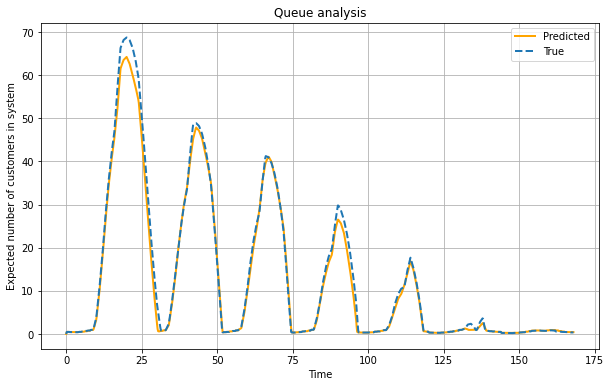

In [25]:
plot_results(df_res, n_true)